In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('info of wind turbine.xlsx')
df.head()

,Capacity (kW),Rotor diameter (m),Hub height (m)
0,10.0,13.0,18.0
1,300.0,35.0,35.0
2,300.0,35.0,35.0
3,90.0,18.0,23.0
4,22.0,10.0,18.0


In [3]:
df_1 = pd.read_excel('turbines.xlsx')
df_2 = df_1[['Offshore','Rated power','Rotor diameter','Minimum hub height','Maximum hub height']]
df_2 = df_2.drop(index=[1510])
drop_list = []
for i in df_2.index:
    if df_2.loc[i][2] == '#ND' or df_2.loc[i][3] == '#ND' or type(df_2.loc[i][2]) == str or type(df_2.loc[i][3]) == str:
        drop_list.append(i)
df_2 = df_2.drop(index=drop_list)
df_2['Average hub height'] = (df_2['Minimum hub height']+df_2['Maximum hub height'])/2
df_2.head()

,Offshore,Rated power,Rotor diameter,Minimum hub height,Maximum hub height,Average hub height
1,No,20,10,18,30,24
3,No,60,15,24,40,32
4,No,100,29,27.5,27.5,27.5
5,No,100,23,43,43,43
6,No,100,30,24,30,27


In [4]:
df_3 = df_2[['Rated power','Rotor diameter','Average hub height']]
df_3.head()

,Rated power,Rotor diameter,Average hub height
1,20,10,24
3,60,15,32
4,100,29,27.5
5,100,23,43
6,100,30,27


In [5]:
df_3 = df_3.rename(columns={'Rated power':'Capacity (kW)','Rotor diameter':'Rotor diameter (m)','Average hub height':'Hub height (m)'})
df_3.head()

,Capacity (kW),Rotor diameter (m),Hub height (m)
1,20,10,24
3,60,15,32
4,100,29,27.5
5,100,23,43
6,100,30,27


In [6]:
df.shape,df_3.shape

((9123, 3), (1023, 3))

In [7]:
frame = [df,df_3]
df_data = pd.concat(frame)
df_data.shape

(10146, 3)

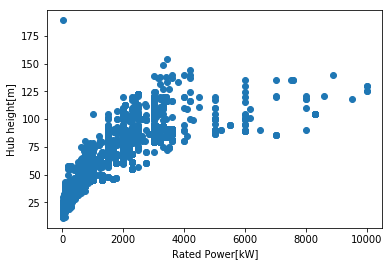

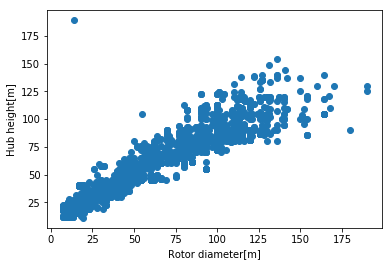

In [8]:
# a general plot to see the relationship between RW and h
#df_data = df.copy()
plt.scatter(df_data['Capacity (kW)'],df_data['Hub height (m)'])
plt.xlabel('Rated Power[kW]')
plt.ylabel('Hub height[m]')
plt.show()

plt.scatter(df_data['Rotor diameter (m)'],df_data['Hub height (m)'])
plt.xlabel('Rotor diameter[m]')
plt.ylabel('Hub height[m]')
plt.show()

In [9]:
df_data['bias'] = np.ravel(np.ones((df_data.shape[0],1))) # adding bias
df_data.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),bias
0,10,13,18,1.0
1,300,35,35,1.0
2,300,35,35,1.0
3,90,18,23,1.0
4,22,10,18,1.0


In [10]:
index = [i for i in range(df_data.shape[0])]
df_data['index']=index
df_data = df_data.set_index('index')
df_data.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),bias
index,,,,
0,10,13,18,1.0
1,300,35,35,1.0
2,300,35,35,1.0
3,90,18,23,1.0
4,22,10,18,1.0


In [11]:
drop_list = []
for index in df_data.index:
    if df_data.loc[index][2] > 175:
        drop_list.append(index)
len(drop_list)

1

In [12]:
df_data.shape

(10146, 4)

In [13]:
df_data = df_data.drop(index=drop_list)
df_data.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),bias
index,,,,
0,10,13,18,1.0
1,300,35,35,1.0
2,300,35,35,1.0
3,90,18,23,1.0
4,22,10,18,1.0


In [14]:
df_data.shape

(10145, 4)

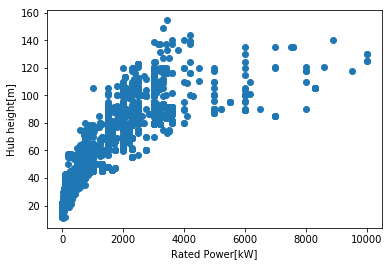

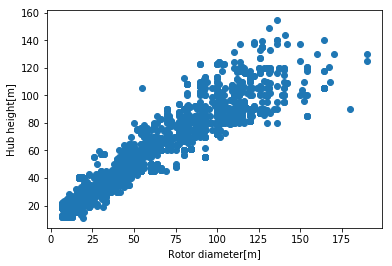

In [15]:
# a general plot to see the relationship between RW and h

plt.scatter(df_data['Capacity (kW)'],df_data['Hub height (m)'])
plt.xlabel('Rated Power[kW]')
plt.ylabel('Hub height[m]')
plt.show()

plt.scatter(df_data['Rotor diameter (m)'],df_data['Hub height (m)'])
plt.xlabel('Rotor diameter[m]')
plt.ylabel('Hub height[m]')
plt.show()

In [16]:
df_data['Hub height (m)'].mean(),df_data['Hub height (m)'].median()

(43.345060620995945, 39.25)

In [17]:
df_data['Hub height (m)'].max(),df_data['Hub height (m)'].min()

(154.5, 11.0)

In [18]:
# By using linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
X = df_data.values.copy()
y = X[:,2]
x = X[:,[0,1,3]] # using all the features
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [20]:
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

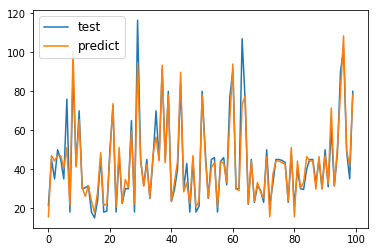

Text(0, 0.5, 'predict')

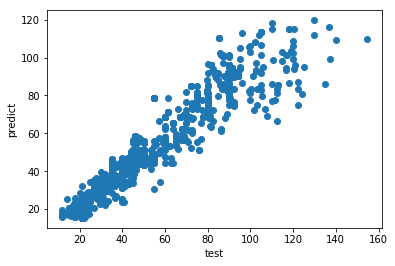

In [21]:
# plot the test dataset with the predicted one
#plt.figure(figsize=(9,6))
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
#plt.ylabel('Rotor diameter[m]',fontsize=12)
#plt.xticks(fontsize=10)
#plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [22]:
from sklearn import metrics

In [23]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

4.115809345820281 44.091061718712965 6.6401100682679175


In [24]:
regr.score(x_train, y_train),regr.score(x_test, y_test),regr.coef_

(0.9262907136331784,
 0.9232124254894456,
 array([-0.00409472,  0.84139003,  0.        ]))

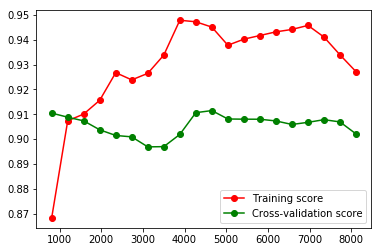

In [25]:
# plot the learning curve to see how the model performs
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(regr, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)#,scoring = 'neg_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

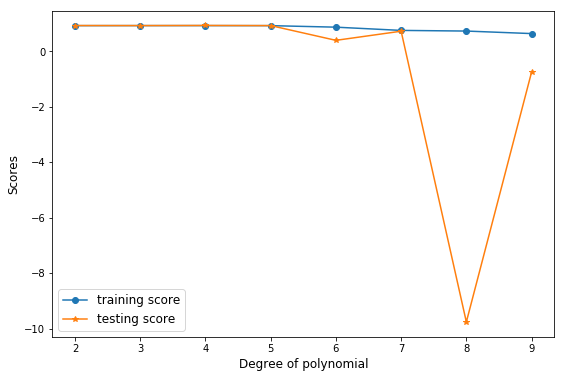

In [26]:
# adding more features by PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
X = df_data.values.copy()
x_p = X[:,[0,1]]
y_r = X[:,[2]]
train_scores = []
test_scores = []
for i in range(2,10):
    poly = PolynomialFeatures(i)
    x_prime = poly.fit_transform(x_p)
    x_train, x_test, y_train, y_test = train_test_split(x_prime,y_r)
    regr = LinearRegression()
    regr.fit(x_train,y_train)
    train_scores.append(regr.score(x_train,y_train))
    test_scores.append(regr.score(x_test,y_test))
    
plt.figure(figsize=(9,6))
plt.plot(range(2,10),train_scores,'o-',label = 'training score')
plt.plot(range(2,10),test_scores,'*-',label = 'testing score')
plt.legend(fontsize = 12)
plt.xlabel('Degree of polynomial',fontsize=12)
plt.ylabel('Scores',fontsize=12)
plt.show()   

In [27]:
train_scores,test_scores

([0.9316939595572061,
  0.9329841042497072,
  0.9328795603197818,
  0.9316466877137982,
  0.8767164470886581,
  0.7599425899188876,
  0.7363225249799512,
  0.6451862040883565],
 [0.9357743986937249,
  0.9341116083076115,
  0.9380921345754951,
  0.9334717275720861,
  0.4011789585844759,
  0.7309002093472975,
  -9.761610450314507,
  -0.7457054775440739])

0.9328226627876806 0.9320018147810635


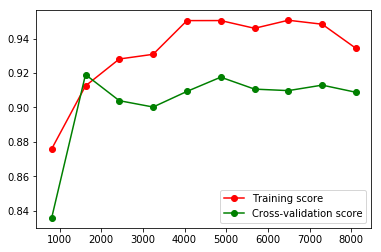

In [28]:
x_p = X[:,[0,1]]# only with RP
y_r = X[:,[2]]
poly = PolynomialFeatures(2)
x_prime = poly.fit_transform(x_p)
x_train, x_test, y_train, y_test = train_test_split(x_prime,y_r)
regr = LinearRegression()
regr.fit(x_train,y_train)
print(regr.score(x_train, y_train),regr.score(x_test, y_test))

train_sizes, train_scores, valid_scores = learning_curve(regr, x_prime, y_r, train_sizes=np.linspace(0.1, 1.0, 10),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()


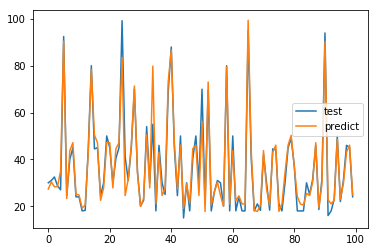

Text(0, 0.5, 'predict')

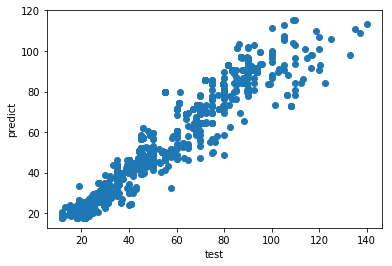

In [29]:
y_pred_LR = regr.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [30]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

3.77448100389146 36.1559599408044 6.012982616040429


In [31]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor

parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, np.ravel(y_train))
y_pred_RF = RF_model.predict(x_test)

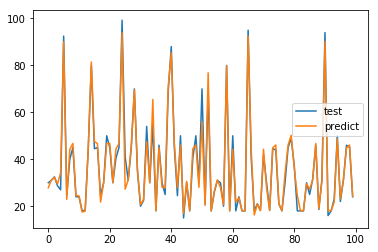

Text(0, 0.5, 'predict')

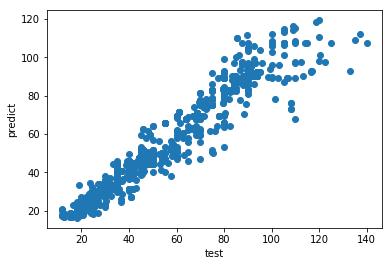

In [32]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [33]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

2.7564497534779298 24.722906533793914 4.972213444110571


In [34]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.9599953195152403, 0.9535038544022136)

In [35]:
RF_model.score(x_prime,y_r),RF_model.score(x_test, y_test)

(0.9584763567455429, 0.9535038544022136)

In [36]:
# by using SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)


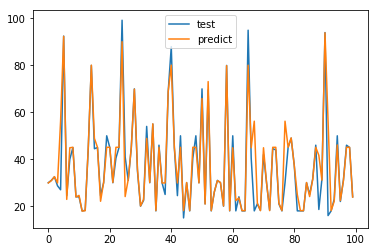

Text(0, 0.5, 'predict')

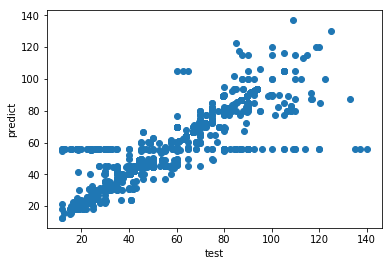

In [37]:
svr_rbf.fit(x_train,np.ravel(y_train))
y_pred_svr_rbf = svr_rbf.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_svr_rbf)
plt.xlabel('test')
plt.ylabel('predict')

In [38]:
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)

3.512108619931188 77.89070806140946 8.825571259777435


In [39]:
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

(0.9665835965215024, 0.8535116533411007)

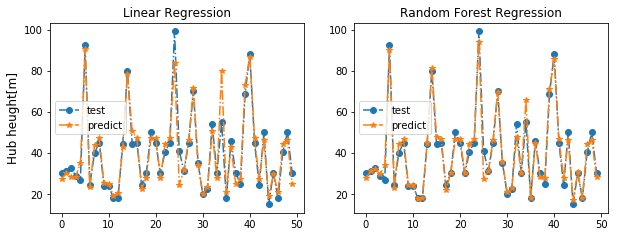

In [40]:
plt.figure(figsize=(10,3.5))

plt.subplot(121)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_LR[0:50],'-.*',markersize=6,label='predict')
plt.ylabel('Hub heught[m]',fontsize=12)
plt.legend()
plt.title('Linear Regression')

plt.subplot(122)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_RF[0:50],'-.*',markersize=6,label='predict')
plt.legend()
plt.title('Random Forest Regression')


plt.show()
#plt.savefig('comparison.png')

In [41]:
# feature extraction, adding new features P**0.5 ,log(P) and P**2
df_data['P_sqrt'] = df_data['Capacity (kW)']**0.5
df_data['P_log'] = np.log(list(df_data['Capacity (kW)']))
df_data['P_square'] = df_data['Capacity (kW)']**2
df_data['1/P'] = 1/df_data['Capacity (kW)']
df_data['R_sqrt'] = [float(i)**0.5 for i in list(df_data['Rotor diameter (m)'])]
df_data['R_log'] = [np.log(float(i)) for i in list(df_data['Rotor diameter (m)'])]
df_data['R_square'] = [float(i)**2 for i in list(df_data['Rotor diameter (m)'])]
df_data['1/R'] = 1/df_data['Rotor diameter (m)']
df_data.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),bias,P_sqrt,P_log,P_square,1/P,R_sqrt,R_log,R_square,1/R
index,,,,,,,,,,,,
0,10,13,18,1.0,3.16228,2.302585,100,0.1,3.605551,2.564949,169.0,0.0769231
1,300,35,35,1.0,17.3205,5.703782,90000,0.00333333,5.916080,3.555348,1225.0,0.0285714
2,300,35,35,1.0,17.3205,5.703782,90000,0.00333333,5.916080,3.555348,1225.0,0.0285714
3,90,18,23,1.0,9.48683,4.499810,8100,0.0111111,4.242641,2.890372,324.0,0.0555556
4,22,10,18,1.0,4.69042,3.091042,484,0.0454545,3.162278,2.302585,100.0,0.1


In [42]:
# feature selection
from sklearn.ensemble import ExtraTreesRegressor
X = df_data.values.copy()
y = X[:,2]
x = X[:,[0,1,3,4,5,6,7,8,9,10,11]]
model = ExtraTreesRegressor()
model.fit(x, y)
print(model.feature_importances_)

[0.1532954  0.02403502 0.         0.10591753 0.12803085 0.02712376
 0.00675715 0.24610889 0.04024864 0.09537539 0.17310736]


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [43]:
from sklearn.feature_selection import RFE
model=LinearRegression() # LinearRegression Model as Estimator

rfe=RFE(model,4)# using 4 features

fit=rfe.fit(x,y)
print( "Feature Ranking(liner): %s" % (fit.ranking_))

Feature Ranking(liner): [5 2 8 4 3 7 1 1 1 6 1]


In [44]:
# after feature selection
X = df_data.values.copy()
y = X[:,2]
x = X[:,[0,1,4,9,11]]
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [45]:
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

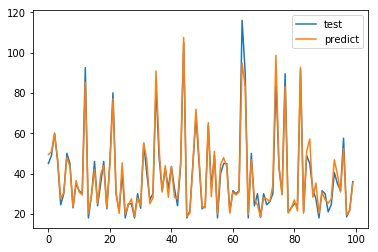

Text(0, 0.5, 'predict')

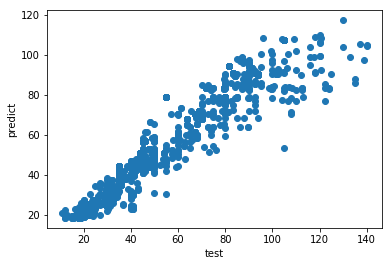

In [46]:
# plot the test dataset with the predicted one
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [47]:
from sklearn import metrics

In [48]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

3.6791721992863384 43.18073217067135 6.571204773150153


In [49]:
regr.score(x_train, y_train),regr.score(x_test, y_test)

(0.9327049341329359, 0.9261839229802369)

In [50]:
# plot the learning curve to see how the model performs
from sklearn.model_selection import learning_curve

In [51]:
train_sizes, train_scores, valid_scores = learning_curve(regr, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)#,scoring = 'neg_mean_squared_error')

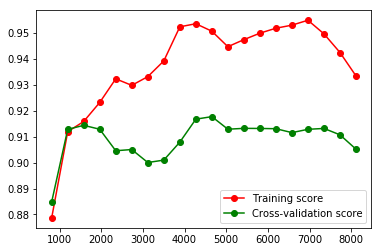

In [52]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [53]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor
parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, y_train)
y_pred_RF = RF_model.predict(x_test)

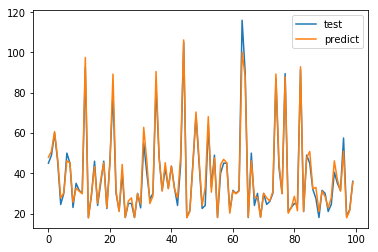

Text(0, 0.5, 'predict')

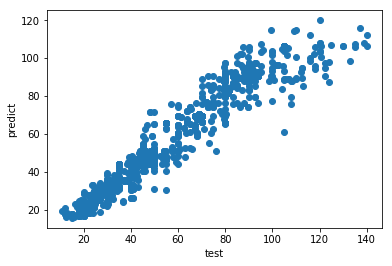

In [54]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [55]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

2.864615710708736 27.401837415034038 5.2346764384280755


In [56]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.9595685402137363, 0.9531574376016484)

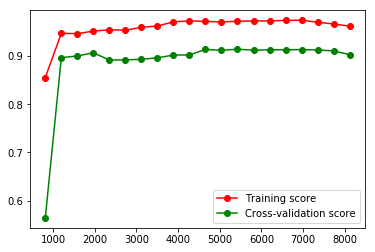

In [57]:
train_sizes, train_scores, valid_scores = learning_curve(RF_model, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [58]:
train_scores_mean

array([0.85533416, 0.94692369, 0.94626636, 0.95142649, 0.95427911,
       0.95340504, 0.95930545, 0.96201899, 0.97078158, 0.97260593,
       0.97156889, 0.97065869, 0.97174637, 0.97250995, 0.97261382,
       0.97375405, 0.97399688, 0.9698828 , 0.96627189, 0.96179438])

In [59]:
test_scores_mean

array([0.56435503, 0.89648744, 0.89995883, 0.90663313, 0.89157817,
       0.89188725, 0.89313223, 0.89608991, 0.90182132, 0.90207013,
       0.91348785, 0.91176063, 0.91398612, 0.91189699, 0.91269745,
       0.91280095, 0.91316742, 0.9123406 , 0.91053688, 0.90274121])

In [60]:
# by using SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

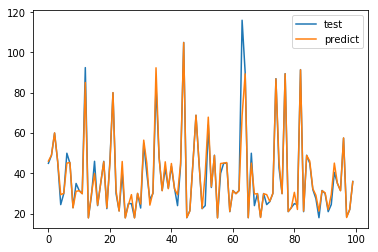

Text(0, 0.5, 'predict')

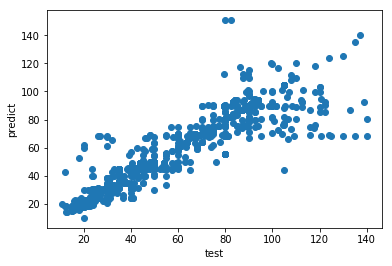

In [61]:
svr_rbf.fit(x_train,y_train)
y_pred_svr_rbf = svr_rbf.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_svr_rbf)
plt.xlabel('test')
plt.ylabel('predict')

In [62]:
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)

2.999449351010602 56.09255912435936 7.489496586844764


In [63]:
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

(0.9601214576836721, 0.90411156883135)

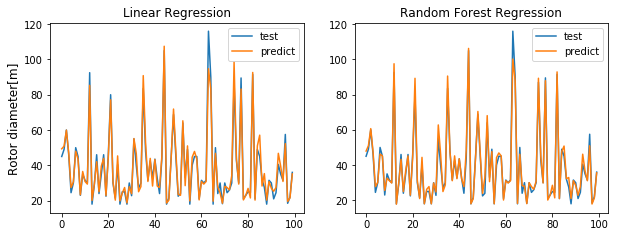

In [64]:
plt.figure(figsize=(10,3.5))

plt.subplot(121)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.ylabel('Rotor diameter[m]',fontsize=12)
plt.legend()
plt.title('Linear Regression')

plt.subplot(122)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.title('Random Forest Regression')

plt.show()